In [1]:
import numpy as np
from numpy import concatenate
import random
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.arima_model import ARMA
from scipy.stats.distributions import chi2
import statsmodels.tsa.stattools as sts 
import seaborn as sns
sns.set()
def parser(x):
	return datetime.strptime(x, "'[%H:%M:%S %d/%m/%Y]'")
series = read_csv('samples(3).csv', header=1,parse_dates=[0],index_col=0, squeeze=True,date_parser=parser)	


C:\Users\engha\anaconda3\envs\hager\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  import sys


In [2]:
series.describe()

count    1706.000000
mean      128.705158
std        13.228321
min        89.400000
25%       118.700000
50%       130.000000
75%       137.975000
max       160.500000
Name: 155.3, dtype: float64

In [3]:
series.isna().sum()

0

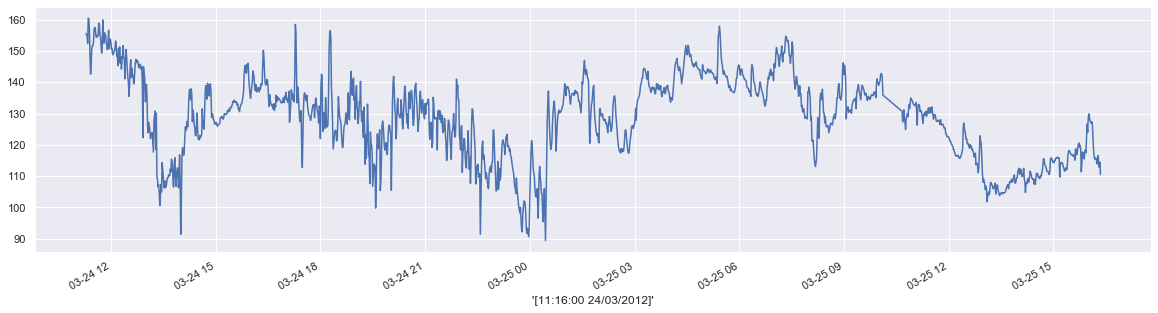

In [4]:
series.plot(figsize=(20,5))


In [5]:
X = series.values
split = round(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=128.289918, mean2=129.120399
variance1=184.938703, variance2=164.488236


In [8]:
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return Series(diff)

# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]
diff=difference(series)

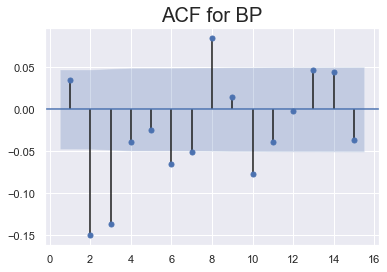

In [9]:
sgt.plot_acf(diff, zero = False, lags = 15)
plt.title("ACF for BP", size = 20)
plt.show()